<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only have one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.

<span style="color:blue">
    
### Group Number :  2420_A2_Grp12

### Student IDs: u6555407, u6588836, u6611178

</span>

## Introduction



In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
### TODO SECTION A: q4 & SECTION B Q1.1
#### We might need actor name and corresponding actor id.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from itertools import combinations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>


Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [13]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [14]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [15]:
query = str("SELECT SUM(p.amount) AS TOTAL_RENTAL_COST"
            + " FROM payment AS p,rental AS r,inventory AS i,film AS f"
            + " WHERE p.rental_id=r.rental_id"
            + " AND r.inventory_id=i.inventory_id"
            + " AND i.film_id=f.film_id"
            + " AND f.title LIKE 'Affair Prejudice'"
            + " AND i.store_id=2;")

execute_sql(query)

,total_rental_cost
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [16]:
query = str("SELECT c.first_name,c.last_name"
            + " FROM customer AS c,rental AS r,inventory AS i,film AS f"
            + " WHERE c.customer_id=r.customer_id"
            + " AND r.inventory_id=i.inventory_id"
            + " AND i.film_id=f.film_id"
            + " AND f.title LIKE '%Affair Prejudice%'"
            + " AND c.store_id=1;")

execute_sql(query)

,first_name,last_name
0,Vivian,Ruiz
1,Nina,Soto
2,Jordan,Archuleta
3,Michael,Silverman
4,Eleanor,Hunt
5,Natalie,Meyer
6,Tommy,Collazo
7,Carmen,Owens
8,Deanna,Byrd
9,Jimmy,Schrader


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [17]:
query = str("SELECT c.first_name,c.last_name,c.customer_id"
            + " FROM customer AS c, payment AS p"
            + " WHERE c.customer_id=P.customer_id"
            + " GROUP BY c.customer_id HAVING SUM(p.amount)>100;")

execute_sql(query)

,first_name,last_name,customer_id
0,Wanda,Patterson,87
1,Dan,Paine,477
2,Priscilla,Lowe,273
3,Guy,Brownlee,550
4,Alice,Stewart,51
5,Yolanda,Weaver,190
6,Kyle,Spurlock,424
7,Nathan,Runyon,406
8,June,Carroll,176
9,Morris,Mccarter,576


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [18]:
query = str("SELECT DISTINCT c.customer_id,c.first_name,c.last_name"
            + " FROM store as s,customer as c, rental as r,inventory as i, film as f"
            + " WHERE s.store_id=c.store_id"
            + " AND c.customer_id=r.customer_id"
            + " AND r.inventory_id=i.inventory_id"
            + " AND i.film_id=f.film_id"
            + " AND s.store_id IN (1,2)"
            + " AND f.title='Angels Life'"
            + " GROUP BY c.customer_id"
            + " HAVING COUNT(c.customer_id)>=2;")

execute_sql(query)

,customer_id,first_name,last_name
0,163,Cathy,Spencer


## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [153]:
customer_rental = str("SELECT * FROM customer c"
                      + " JOIN payment p"
                      + " ON c.customer_id=p.customer_id"
                      + " RIGHT JOIN rental r"
                      + " ON p.rental_id=r.rental_id"
                      + " JOIN inventory i"
                      + " ON i.inventory_id=r.inventory_id"
                      + " JOIN film f"
                      + " ON i.film_id=f.film_id"
                      + " JOIN film_category fc"
                      + " ON fc.film_id=f.film_id"
                      + " JOIN category"
                      + " ON category.category_id=fc.category_id;"
                      )

customer_country = str("SELECT * FROM customer c"
                       + " JOIN address a"
                       + " ON c.address_id=a.address_id"
                       + " JOIN city"
                       + " ON city.city_id=a.city_id"
                       + " JOIN country"
                       + " ON country.country_id=city.country_id;")

film_actor = str("SELECT * FROM film f"
                 + " JOIN film_actor fa"
                 + " ON fa.film_id=f.film_id"
                 + " JOIN actor a"
                 + " ON a.actor_id=fa.actor_id;"
                 )


category_name=str("SELECT * FROM category;")

inventory=str("SELECT * FROM inventory;")

df_customer_rental = execute_sql(customer_rental)
df_customer_country = execute_sql(customer_country)
df_film_actor = execute_sql(film_actor)
df_category_name=execute_sql(category_name)
df_inventory=execute_sql(inventory)

df_film_actor.to_csv("film_actor.csv")
df_customer_rental.to_csv("customer_rental.csv")
df_customer_country.to_csv("customer_country.csv")
df_inventory.to_csv("inventory.csv")

In [158]:
# The number copies for each film in the stores.
df_inventory_count=df_inventory.groupby("film_id").count().rename({"store_id":"count"},axis=1)
df_inventory_count=df_inventory_count["count"].to_frame()

In [159]:
df_customer_country = df_customer_country.loc[:, ~df_customer_country.columns.duplicated()]
df_customer_country = df_customer_country[["customer_id", "address_id", "active", "city_id", "country_id", "country"]]

df_customer_rental = df_customer_rental.loc[:, ~df_customer_rental.columns.duplicated()]
df_customer_rental = df_customer_rental[
    ["customer_id", "store_id", "payment_id", "rental_id", "amount", "inventory_id", "film_id", "rental_duration",
     "rental_rate", "length", "replacement_cost", "rating", "special_features", "fulltext", "category_id"]]

df_film_actor = df_film_actor.loc[:, ~df_film_actor.columns.duplicated()]
df_film_actor["actor_name"] = df_film_actor.first_name.map(str) + " " + df_film_actor.last_name
df_film_actor = df_film_actor[["film_id", "actor_id", "actor_name"]]
df_film_actor

,film_id,actor_id,actor_name
0,1,1,Penelope Guiness
1,23,1,Penelope Guiness
2,25,1,Penelope Guiness
3,106,1,Penelope Guiness
4,140,1,Penelope Guiness
5,166,1,Penelope Guiness
6,277,1,Penelope Guiness
7,361,1,Penelope Guiness
8,438,1,Penelope Guiness
9,499,1,Penelope Guiness


In [160]:
df_customer_rental_country = df_customer_rental.merge(df_customer_country, on='customer_id', how='inner')
df_customer_rental_country

,customer_id,store_id,payment_id,rental_id,amount,inventory_id,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,category_id,address_id,active,city_id,country_id,country
0,341.0,1.0,17503.0,1520.0,7.99,3419,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,346,1,151,67,Netherlands
1,341.0,1.0,17504.0,1778.0,1.99,2512,552,5,0.99,130,15.99,PG,[Trailers],'butler':17 'charact':5 'escap':15 'first':20 ...,6,346,1,151,67,Netherlands
2,341.0,1.0,17505.0,1849.0,7.99,2507,551,3,4.99,138,9.99,PG,[Behind the Scenes],'convent':21 'forens':16 'home':2 'kill':14 'l...,13,346,1,151,67,Netherlands
3,341.0,1.0,17506.0,2829.0,2.99,2047,445,5,2.99,100,11.99,G,"[Trailers, Deleted Scenes]",'boat':20 'boy':8 'doctor':2 'documentari':5 '...,4,346,1,151,67,Netherlands
4,341.0,1.0,17507.0,3130.0,7.99,2569,563,6,4.99,165,16.99,R,[Commentaries],'california':19 'challeng':14 'crocodil':11 'f...,10,346,1,151,67,Netherlands
5,341.0,1.0,17508.0,3382.0,5.99,131,26,3,0.99,86,15.99,G,"[Commentaries, Deleted Scenes]",'abandon':20 'amaz':4 'amus':21 'anni':1 'boat...,14,346,1,151,67,Netherlands
6,341.0,1.0,20200.0,10605.0,0.99,680,149,7,0.99,150,21.99,NC-17,"[Trailers, Commentaries, Behind the Scenes]",'action':5 'action-pack':4 'astronaut':13 'boa...,3,346,1,151,67,Netherlands
7,341.0,1.0,20201.0,11305.0,6.99,1690,369,4,4.99,56,22.99,PG,[Deleted Scenes],'baloon':20 'cow':17 'dog':8 'explor':11 'fact...,14,346,1,151,67,Netherlands
8,341.0,1.0,20202.0,11723.0,2.99,1665,363,3,0.99,54,12.99,R,[Trailers],'administr':14 'baloon':22 'battl':17 'car':10...,12,346,1,151,67,Netherlands
9,341.0,1.0,20203.0,13059.0,0.99,3810,834,4,0.99,151,26.99,G,"[Trailers, Commentaries, Deleted Scenes, Behin...",'defeat':15 'dog':17 'fanci':4 'gulf':20 'hell...,6,346,1,151,67,Netherlands


In [161]:
#Popularity 
df_popularity=df_film_actor.groupby("actor_id").count()["actor_name"]
df_popularity=df_popularity.to_frame().rename({"actor_name":"popularity"},axis=1)
df_film_actor=df_film_actor.merge(df_popularity,on="actor_id")
df_popularity

,popularity
actor_id,
1,19
2,25
3,22
4,22
5,29
6,20
7,30
8,20
9,25


In [162]:
# Creating popularity_mean & popularity_max
popularity_mean_list = []
popularity_max_list = []
filmID_list = []
popularity_sum=[]
actor_count=[]


for ele in df_film_actor.groupby(df_film_actor['film_id']):
    filmID_list.append(ele[1]['film_id'].values[0])
    popularity_mean_list.append(np.mean(np.asarray(list(ele[1]['popularity']))))
    popularity_max_list.append(max(list(ele[1]['popularity'])))
    popularity_sum.append(sum(list(ele[1]['popularity'])))
    actor_count.append(len(list(ele[1]['popularity'])))
  
    
film_popularity= {'film_id': filmID_list,"popularity_sum":popularity_sum,"actor_count":actor_count,"popularity_max":popularity_max_list, 'popularity_mean': popularity_mean_list}

df_film_popularity = pd.DataFrame(film_popularity)
df_film_popularity


,film_id,popularity_sum,actor_count,popularity_max,popularity_mean
0,1,278,10,40,27.800000
1,2,109,4,33,27.250000
2,3,136,5,32,27.200000
3,4,141,5,36,28.200000
4,5,141,5,39,28.200000
5,6,216,7,37,30.857143
6,7,135,5,30,27.000000
7,8,88,4,24,22.000000
8,9,251,9,34,27.888889
9,10,235,8,35,29.375000


In [165]:
df_cleaned = df_customer_rental.merge(df_film_popularity, on='film_id', how='inner')
df_cleaned=df_cleaned.merge(df_inventory_count,on="film_id")
df_cleaned

,customer_id,store_id,payment_id,rental_id,amount,inventory_id,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,category_id,popularity_sum,actor_count,popularity_max,popularity_mean,count
0,341.0,1.0,17503.0,1520.0,7.99,3419,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
1,345.0,1.0,17525.0,2766.0,4.99,3421,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
2,310.0,2.0,19941.0,14972.0,5.99,3422,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
3,329.0,2.0,20092.0,14900.0,4.99,3420,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
4,332.0,1.0,20115.0,14783.0,4.99,3419,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
5,360.0,2.0,20372.0,11264.0,6.99,3420,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
6,152.0,1.0,24144.0,11638.0,6.99,3421,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
7,453.0,1.0,27274.0,9406.0,6.99,3419,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
8,460.0,1.0,27340.0,6613.0,4.99,3421,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4
9,490.0,1.0,27680.0,5654.0,4.99,3419,749,6,4.99,153,19.99,R,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0,4


In [164]:
# df_cleaned=df_cleaned.merge(df_film_popularity, on='film_id', how='inner')
# to be removed later on 
# df_cleaned.to_csv('df_cleaned.csv')

In [44]:
# df_cleaned.to_csv("df_cleaned.csv")

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [3]:
#Loading & Minor Cleanup Of DataFrame
df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned = df_cleaned.drop(["Unnamed: 0"], axis=1)
df_category_name=pd.read_csv("data/dvd_rental/category.csv")

In [60]:
def feature_combinations(dataframe, dependent_variable):
    '''Helper function for producing all possible combinations of independent variables 
       based on the given dataframe & the dependent_variable
       @param:dataframe - The primary DataFrame in which your data resides.
       @return:output - A list of list which has all possible combinations.'''
    output = []
    independent_variables = []
    for var in dataframe.columns:
        if var != dependent_variable:
            independent_variables.append(var)
    for i in range(len(independent_variables)):
        for combination in list(combinations(independent_variables, i + 1)):
            output.append(combination)
    return output 

In [29]:
df_cleaned

,customer_id,store_id,payment_id,rental_id,amount,inventory_id,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,category_id,popularity_sum,actor_count,popularity_max,popularity_mean
0,341.0,1.0,17503.0,1520.0,7.99,3419,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
1,345.0,1.0,17525.0,2766.0,4.99,3421,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
2,310.0,2.0,19941.0,14972.0,5.99,3422,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
3,329.0,2.0,20092.0,14900.0,4.99,3420,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
4,332.0,1.0,20115.0,14783.0,4.99,3419,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
5,360.0,2.0,20372.0,11264.0,6.99,3420,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
6,152.0,1.0,24144.0,11638.0,6.99,3421,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
7,453.0,1.0,27274.0,9406.0,6.99,3419,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
8,460.0,1.0,27340.0,6613.0,4.99,3421,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0
9,490.0,1.0,27680.0,5654.0,4.99,3419,749,6,4.99,153,19.99,4,"[Deleted Scenes, Behind the Scenes]",'abandon':19 'astronaut':8 'beauti':4 'confron...,11,135,5,33,27.0


In [47]:
def highlight_column(s,column_name="",color="yellow"):
    '''
    Highlights a column of a Dataframe
    @param column_name : The column's name of the column which needs to be highlighted.
    @return A list of CSS attributes.
    '''
    if s.name==column_name:
        return ['background-color:'+color]*len(s)
    else:
        return ['']*len(s)

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

- For a given dataset,decision trees can be used to perform classification,not clustering [(Both are similar,but different)](https://techdifferences.com/difference-between-classification-and-clustering.html) .Decision Trees are a form of supervised learning which uses Heuristics(attribute selection measures) such as Information Gain,Gain Ratio or Gini index to decide the decision nodes of the tree.Decision trees require labeled data to train on in order to predict on an unlabeled dataset, and  thus by training on training dataset each node's conditions are set.Upon using a new data on this model to predict the class/label of the input it will refer to the appropriate label which is mapped to the Leaf node.However, if one tries to use clustering, the decision tree algorithm will not support it as it needs the labels in order to  train it's model.
- Counter - Example:
<img src='Decision Tree Paint.png' width="483" height="300">
- Here the decision tree is trained on the training data.It isnt viable to train the decision tree model without any labels as it will make decision trees a unsupervised learning algorithm.Although there are unsupervised learning form of decision trees,[Resource](https://pdfs.semanticscholar.org/8996/148e8f0b34308e2d22f78ff89bf1f038d1d6.pdf).

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

(Assumed that the centroids are randomly assigned and the number of the centroids are the same each time)

The results are usually different. But, it depends on the data and the centroids number. For example, if the data has obvious clusters, and the number of centroids are equal to its clusters. K-means Clustering Algorithm will generate the same result each time no matter where the initial centroids are. For other kinds of data, the result usually depends on the initial position of the centroids.

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

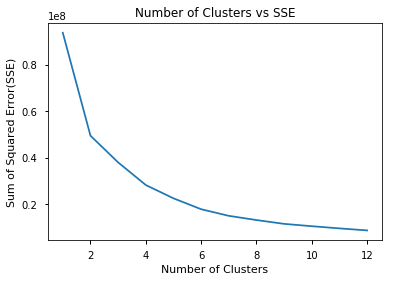

In [27]:
# Change Category data "Rating" from String to Numeric
df_elbow=df_cleaned
df_elbow['rating'] = df_elbow['rating'].astype("category").cat.codes
#    	actor_count
# Principal Component Analysis - Dimensionality Reduction
pca = PCA(n_components=2)
df_X = df_elbow[['rental_duration', 'rental_rate', 'length', 'replacement_cost', "popularity_sum",'rating', 'category_id']]
df_X = df_X.dropna()
pca.fit(df_X)
transform = pca.transform(df_X)

# Finding the best number of clusters (k) for KMeans
sse = []
for i in range(1, 13):
    KM = KMeans(n_clusters=i)
    KM.fit(transform)
    sse.append(KM.inertia_)
plt.plot(range(1, 13), sse)
plt.title("Number of Clusters vs SSE")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error(SSE)")
plt.show()

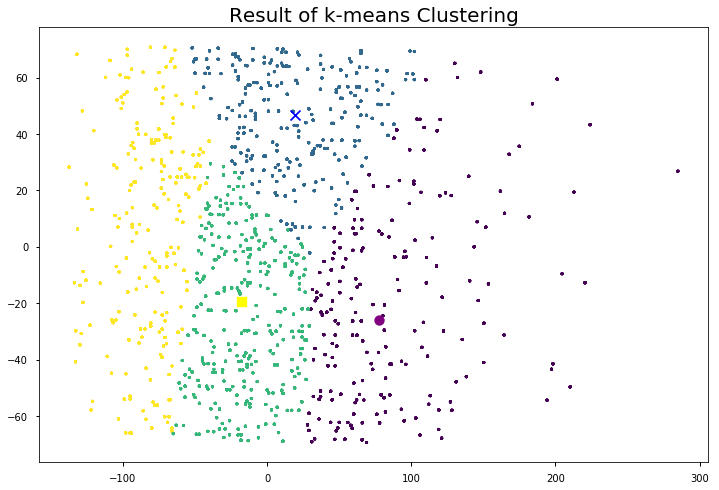

In [28]:
# As shows from above, the optimal value of K is 3
km = KMeans(n_clusters=4, max_iter=1)
km.fit(transform)
predicted_clusters = km.predict(transform)
centers = km.cluster_centers_

# Draw the centriod
markers = ['o', 'x', 's']
colors = ['purple', 'b', 'yellow']

plt.figure(figsize=(12, 8))
plt.scatter(transform[:, 0], transform[:, 1], c=predicted_clusters, s=7)
for ind in range(len(markers)):
    plt.scatter(centers[ind, 0], centers[ind, 1], c=colors[ind], s=100, marker=markers[ind])
plt.title('Result of k-means Clustering', fontsize=20)
plt.show()

df_X['cluster'] = predicted_clusters
cluster0 = df_X[df_X['cluster'] == 0]
cluster1 = df_X[df_X['cluster'] == 1]
cluster2 = df_X[df_X['cluster'] == 2]


df_cluster0_description=cluster0.describe()
df_cluster1_description=cluster1.describe()
df_cluster2_description=cluster2.describe()

# # # https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df_cluster0_description)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df_cluster1_description)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df_cluster2_description)


####   Finding the differences within the features of each cluster. 
<a id='category_id'></a>

In [50]:
# Finding the number of movies rented for each clusters based on the categories.
df_category=pd.DataFrame()
    
#Obtains the category_id of the highest frequently rented movie within each cluster and then rename it.
for cluster_no in range(3):
    s_count_category_id = df_X[df_X['cluster'] == cluster_no].groupby("category_id").count().rating
    s_count_category_id.index=df_category_name.name
    df_category[cluster_no]=s_count_category_id

#Minor changes to output dataframe.
df_category=df_category.T
df_category = df_category.rename_axis(["Cluster Name"],axis=0).rename_axis(["Categories"],axis=1)
s = df_category.style.background_gradient(cmap='coolwarm')
print("**The number of movies rented for each clusters based on the categories.**")
s


**The number of movies rented for each clusters based on the categories.**


Categories,Action,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
Cluster Name,,,,,,,,,,,,,,,,
0,384,344,397,242,254,322,324,490,322,411,355,343,366,367,281,295
1,422,511,296,367,385,391,277,336,317,179,288,267,411,484,318,292
2,306,311,252,330,302,337,442,270,394,379,203,220,167,250,568,239


In [54]:
def dataframe_description_selector(measure,list_df_clusters):
    df_clusters_description=pd.DataFrame(list_df_clusters[0].loc[measure]).T
    for x in range(1,len(list_df_clusters)):
        df_clusters_description=df_clusters_description.append(list_df_clusters[x].loc[measure])
    df_clusters_description=df_clusters_description.drop("cluster",axis=1)
    df_clusters_description.index=["Cluster Number "+ str(x) for x in range(3)]
    return df_clusters_description

##### Cluster's Attributes's Means
<a id='means'></a>

In [55]:
# Showing the differences in the means of the attributes of each cluster.   
list_df_cluster=[df_cluster0_description,df_cluster1_description,df_cluster2_description]
print("**Means of various features of each cluster**")
dataframe_description_selector("mean",list_df_cluster) \
                       .style.apply(highlight_column,column_name="length") \
                       .apply(highlight_column,column_name="rating",color="lightblue")    

**Means of various features of each cluster**


,rental_duration,rental_rate,length,replacement_cost,rating,category_id
Cluster Number 0,5.00819,2.95289,116.982,20.1173,2.08514,8.4557
Cluster Number 1,4.82241,2.85573,69.7697,20.0492,1.91843,8.17073
Cluster Number 2,4.97425,3.01897,162.794,20.4741,2.21167,8.45352


##### Standard Deviation of  Cluster's Attributes.
<a id='std'></a>

In [56]:
#Showing the differences in the standard deviation of the attributes of each cluster. 
list_df_cluster=[df_cluster0_description,df_cluster1_description,df_cluster2_description]
print("**Standard Deviation of various features of each cluster**")
dataframe_description_selector("std",list_df_cluster)

**Standard Deviation of various features of each cluster**


,rental_duration,rental_rate,length,replacement_cost,rating,category_id
Cluster Number 0,1.398470,1.653831,13.553504,6.055674,1.361388,4.542647
Cluster Number 1,1.400571,1.640425,13.767068,6.040217,1.372574,4.794636
Cluster Number 2,1.392611,1.648275,13.556242,6.141900,1.391065,4.592813


##### Count & minimums/maximums of each cluster.

In [57]:
print("**The count of films watched by customer in each cluster.**")
dataframe_description_selector("count",list_df_cluster)["length"].to_frame().rename({"length":"Count"},axis=1)

**The count of films watched by customer in each cluster.**


,Count
Cluster Number 0,5497.0
Cluster Number 1,5541.0
Cluster Number 2,4970.0


In [58]:
print("The minimum & maximum of the length attribute of each cluster")
df_min_max_clusters=dataframe_description_selector("min",list_df_cluster).length
df_min_max_clusters=df_min_max_clusters.to_frame()
df_min_max_clusters["Max"]=dataframe_description_selector("max",list_df_cluster).length.values
df_min_max_clusters=df_min_max_clusters.rename({"length":"Min"},axis=1)
df_min_max_clusters["Range"]=df_min_max_clusters.Max-df_min_max_clusters.Min
df_min_max_clusters

The minimum & maximum of the length attribute of each cluster


,Min,Max,Range
Cluster Number 0,93.0,140.0,47.0
Cluster Number 1,46.0,92.0,46.0
Cluster Number 2,141.0,185.0,44.0


#### <span style="color:blue"> Your justifications & commentary here: </span>
- We drop the feature "Year" because every vaule of it is 2006, which makes no contribution to the model.
- The k value was decided based on using elbow method to find the optimal k clusters such that it has a minimised misrepresentation of cluster. The Point at which there is a significant change in Sum of squared error resulting in a notable, sharp dip in the plot, is the elbow point for the given data. Based on the elbow method's result, the appropriate k value (k = 3) is used for clustering.
- The dataset is equally distributed so that the clustering is not obvious and not very meaningful.
- We have tried multiple values but since the dataset is equally distributed, the number of iterations won't be very high. So we decided to use max interactions 30.
- The number of data points in cluster 0 has a notable difference when compared to the other clusters.

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>


#### <span style="color:blue"> Your answer here: </span>
Based on [the means](#means),it notable that the length of the films has some significant differences.Furthermore, the constant standard deviation [the standard deviation](#std) across all cluster ensures that the each cluster's length of films has some effect on the respective cluster.The cluster with the most count of datapoints, has the longest  average film length.

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [129]:
# Loading appropriate data
df_classification_original = df_cleaned[["category_id","film_id", "rental_rate", "rating", \
                                         "length", "rental_duration", "replacement_cost","popularity_sum", "amount"]]

# Converting dtypes of columns accordingly 
df_classification_original.replacement_cost=df_classification_original.replacement_cost.astype(np.int64)
df_classification_original.rental_rate=df_classification_original.rental_rate.astype(np.int64)


# Converting categorical data(rating)
le = LabelEncoder()
df_classification_original.rating = le.fit_transform(df_classification_original.rating)



df_classification_original_clone=df_classification_original
df_classification_original_clone=df_classification_original_clone.dropna()
df_classification_original_clone.amount=df_classification_original_clone.amount.astype(np.float64)

# Replacing amounts with it's mean values & joining dataframes based on film_id
df_amount_mean=df_classification_original_clone.groupby("film_id").agg({"amount":"mean"})

# # Getting other columns which are constant for each respective film_id 
df_classification_original = df_classification_original.drop(["amount"], axis=1).drop_duplicates()


# # Joining the df_amount_means to the previous dataframe
df_classification_original = df_classification_original.join(df_amount_mean, on="film_id")
df_classification_original = df_classification_original.reset_index().drop(["film_id"], axis=1)
df_classification_original = df_classification_original.astype(np.int64)  # For KNN function data should be in integers
df_classification_original=df_classification_original.drop(["index"],axis=1)
df_classification_original

# df_classification_original

# # df_classification_original_clone.dropna()

# #Making the currently rented film amounts as 0.

# df_classification_original.amount=df_classification_original.amount.astype(np.float64)
# print(df_classification_original.shape)


# Replacing amounts with it's mean values & joining dataframes based on film_id
# df_amount_mean=df_classification_original.groupby("film_id").agg({"amount":"mean"})
# print(df_amount_mean)


# # Getting other columns which are constant for each respective film_id 
# df_classification_original = df_classification_original.drop(["amount"], axis=1).drop_duplicates()

# # Joining the df_amount_means to the previous dataframe
# df_classification_original = df_classification_original.join(df_amount_mean, on="film_id")
# df_classification_original = df_classification_original.reset_index().drop(["film_id"], axis=1)
# df_classification_original = df_classification_original.astype(np.int64)  # For KNN function data should be in integers
# df_classification_original=df_classification_original.drop(["index"],axis=1)

# df_classification_original

,category_id,rental_rate,rating,length,rental_duration,replacement_cost,popularity_sum,amount
0,11,4,4,153,6,19,135,6
1,6,0,2,130,5,15,131,2
2,13,4,2,138,3,9,257,6
3,4,2,0,100,5,11,178,4
4,10,4,4,165,6,16,82,5
5,14,0,0,86,3,15,75,2
6,9,4,4,161,7,22,122,5
7,11,4,2,85,4,24,178,6
8,14,2,3,119,4,12,117,4
9,8,4,2,92,7,9,163,5


In [130]:
def knn_classification(df_classification,features):
    '''Based on given features,a KNN classification will be done for all possible combinations.
       @param df_classification: The input dataframe which contans the dependent variable and the other features
       @param features: A list which contains features which should be recognised by the classification
       @result df_scores: A dataframe which contains all model's Accuracy Scores '''

    #Initialisations
    kvalues=int(np.sqrt(df_classification.shape[0]))
    # Making sure k values is odd.
    kn = KNeighborsClassifier(n_neighbors=(kvalues if kvalues%2!=0 else kvalues+1))
    all_combinations = feature_combinations(df_classification[features], "rental_rate")
    df_scores = pd.DataFrame()

    # Generating models for each respective combination.
    for combination in all_combinations:
        x_train, x_test, y_train, y_test = train_test_split(df_classification[list(combination)], \
                                                        df_classification.rental_rate, test_size=0.33)
        fit = kn.fit(x_train, y_train)
        df_scores[str(list(combination))] = [np.mean(cross_val_score(kn, x_test, y_test, cv=10, scoring='accuracy'))]
        
        #On the basis current combination generate models for different types of reduced dimensionality.
         # trying a combination in which dimensionality of the features are reduced using PCA.  
        if (len(combination) > 1):
            for i in range(len(combination) - 1):          
                pca = PCA(n_components=i + 1)
                data_x = pca.fit_transform(df_classification[list(combination)])
                x_train, x_test, y_train, y_test = train_test_split(data_x, df_classification.rental_rate, test_size=0.33)
                fit = kn.fit(x_train, y_train)
                df_scores["PCA_" + str(i + 1) + str(list(combination))] = [np.mean(cross_val_score(kn, data_x, df_classification.rental_rate, cv=10, scoring='accuracy'))]

    #Making Dataframe more comprehensible .           
    df_scores.index = ["Scores"]
    df_scores = df_scores.T
    df_scores = df_scores.sort_values(by=["Scores"], ascending=False)

    # # https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df_scores.head())

In [131]:
knn_classification(df_classification_original,df_classification_original.columns)

,Scores
"['rating', 'rental_duration', 'amount']",0.946453
"['rental_duration', 'amount']",0.943284
"PCA_1['rental_duration', 'amount']",0.933897
"PCA_1['rating', 'amount']",0.862552
['amount'],0.861290


In [132]:
# Checking Variance Inflation Factor for the feature in df_classification.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_classification_original.values, i) for i in range(df_classification_original.shape[1])]
vif["Features"] = df_classification_original.columns
vif

,VIF Factor,Features
0,4.350923,category_id
1,13.788614,rental_rate
2,3.133363,rating
3,8.651837,length
4,12.119942,rental_duration
5,10.159133,replacement_cost
6,6.163866,popularity_sum
7,25.599559,amount


In [136]:
#Removing amount as a feature & doing classification again.
knn_classification(df_classification_original,df_classification_original.columns[~df_classification_original.columns.str.contains("amount")])

,Scores
"['rating', 'length', 'rental_duration', 'replacement_cost', 'popularity_sum']",0.405383
"['category_id', 'rating']",0.405010
"['category_id', 'rating', 'replacement_cost', 'popularity_sum']",0.400700
"['rental_duration', 'popularity_sum']",0.382694
['category_id'],0.379695


In [66]:
##Support Vector Machines
svmo = svm.SVC(kernel='linear') 
features=df_classification.columns[~df_classification.columns.str.contains("amount")]
all_combinations=feature_combinations(df_classification[features],"rental_rate")
df_scores=pd.DataFrame()

for combination in all_combinations:
    x_train,x_test,y_train,y_test=train_test_split(df_classification[list(combination)],df_classification.rental_rate,test_size=0.2)
    svmo = svm.SVC(kernel='linear') # Linear Kernel
    svmo.fit(x_train, y_train)
    y_pred = svmo.predict(x_test)
    df_scores[str(list(combination))]=[metrics.accuracy_score(y_test, y_pred)]
            
df_scores.index=["Scores"]
df_scores=df_scores.T
df_scores=df_scores.sort_values(by=["Scores"],ascending=False)

# # https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_scores)


,Scores
"['category_id', 'replacement_cost', 'film_rented_count']",0.413613
"['category_id', 'rental_duration']",0.413613
['category_id'],0.408377
"['category_id', 'rating', 'replacement_cost']",0.397906
"['category_id', 'rating', 'length', 'rental_duration', 'film_rented_count']",0.392670
"['category_id', 'rating', 'rental_duration']",0.392670
"['category_id', 'replacement_cost']",0.387435
"['rating', 'replacement_cost']",0.382199
"['category_id', 'rental_duration', 'replacement_cost']",0.376963
"['category_id', 'length', 'rental_duration', 'replacement_cost']",0.376963


#### <span style="color:blue"> Your justifications & commentary here: </span>

- We explored that dataset and found out that data itselft has logic issues that could influence the model. Giving the same film, store, rental duration and rental rate, the amount should be the same but it is not. 


- When building the model, we first created the K-Nearest Neighbours algorithm with the category_id","film_id", "rental_rate", "rating", "length", "rental_duration", "replacement_cost", "amount" and got the perfect score of about 0.97. The results show that we are overfitting the data and we suspected that some independent variables have multicollinearity to one another. So, we tried to find out by using the variance inflation factor method (VIF) which indicates the variables are not completely independent of each other if the result is over 10. We also find out that the VIF of feature 'amount' is over 27 which shows very serious multicollinearity. So, we re-ran K-Nearest Neighbours algorithms without the feature 'amount' and it got a score of 0.4 which is our final prediction. We also used the Cross-validation method to avoid overfitting.

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

- For this kind of large dataset,it is better to have KMeans clustering as a pre_processing step before classification.By using clustering as the pre-processing, it minimizes the constraint that the original KNN have i.e high level of computation complexity due to the large training sample data. That means if training data is too large, the KNN algorithmn takes more time to calculate.However,when we use clustering as a pre-process, it not only prevent us from taking time but also help us improve the data accuracy, and minimize processing time. The only constraint of using this combination algorithmns is only on the small data so that in the large dataset like ours have no issues to implement. 

- We can use this combination by grouping training data of each classification to the  K-means algorithm, and take all the centroids of clusters as the new training data. All training data that we got from the clusters will be used in classification with KNN algorithm to calculate the accuracy.


Referenced from
Buana, P.W., Jannet, S.D.R.M. and Putra, I.K.G.D., 2012. Combination of k-nearest neighbor and k-means based on term re-weighting for classify Indonesian news. International Journal of Computer Applications, 50(11), pp.37-42.


To be removed Later
 Second, grouping
all the training samples of each category of K-means algorithm,
and take all the cluster centers as the new training sample

 Third,
the modified training samples are used for classification with
KNN algorithm. Finally, calculate the accuracy of the evaluation
using precision, recall and f-measure. 

** The traditional KNN text classification has three limitations.
First, high calculation complexity to find out the k nearest
neighbor samples, all the similarities between the training
samples must be calculated. With less training samples,
calculation time is not significant, but if the training set contains
a huge number of samples, the KNN classifier needs more time
to calculate the similarities.So, it can  



***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split it on a range of values (to convert it to a categorical variable, for example).
* Attribute selection in the tree uses information gain.
* You can use LaTeX and/or markdown to format your equations.

In [ ]:
df_rain = pd.read_csv("rain.csv")
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

replacement_items = {"No": 0, "Yes": 1, "Low": 1, "Medium": 2, "High": 3}
df_rain = df_rain.replace(replacement_items)
df_rain_X = df_rain.drop(labels=['Rain'], axis=1)
df_rain_y = df_rain['Rain']
dt = DecisionTreeClassifier(criterion="entropy", presort=True)
dt.fit(df_rain_X, df_rain_y)
dotf = export_graphviz(dt, out_file='decision_tree.dot')

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>


<span style="color:blue">
    
#### By using the formula of entrophy which is $H(X)=\sum_{x\epsilon X} p(x) log_2p(x)$ we get $-\frac{3}{12}(log_2 \frac{3}{12}) -\frac{9}{12}(log_2 \frac{9}{12})$, The result of  initial entropy of Cloudy will be approximately 0.8112



</span>

#### 2. Which attribute would the decision-tree building algorithm choose at the root of the tree?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### Cloudy would be the best attribute for choosing the decision tree building because it has more information gain than the other attributes.


</span>

#### 3. Calculate and specify the information gain of the attribute you chose to split on in the previous question

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>